In [3]:
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/16/c5/99417b583a99f69c40fbd965ea22eca39a59e499619d75d0375f9c60c3c8/matplotlib-3.6.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/97/81/7b787979b5c87aa74366f397b170e603c701cc815d677e67c1e44f71db79/contourpy-1.0.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (295 kB)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from itertools import product

In [5]:
def func(x):
    return x**2 - 2*x - 3

def fprime(x):
    return 2*x - 2

In [30]:
def plotFunc(x0):
    x = np.linspace(-5, 7, 100)
    plt.plot(x, func(x))
    plt.plot(x0, func(x0), 'bs', markersize=12)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('Objective Function')

def plotPath(xs, ys, x0):
    plotFunc(x0)
    plt.plot(xs, ys, linestyle='--', marker='o', color='orange')
    plt.plot(xs[-1], ys[-1], 'bx', markersize=12)

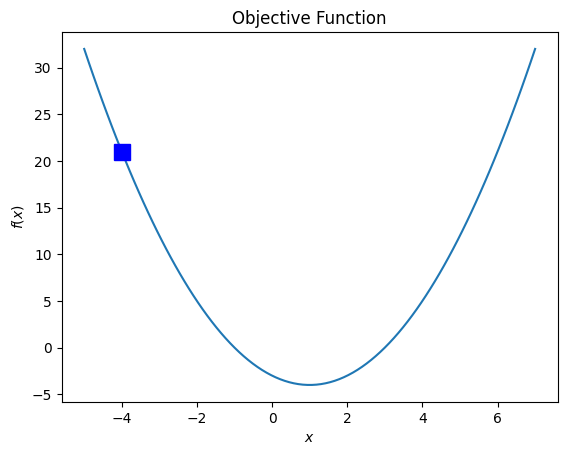

In [31]:
x0 = -4
plotFunc(x0)

In [32]:
def GradientDescentSimple(func, fprime, x0, alpha, tol=1e-5, max_iter=1000):
    # initialize x, f(x), and -f'(x)
    xk = x0
    fk = func(xk)
    pk = -fprime(xk)
    # initialize number of steps, save x and f(x)
    num_iter = 0
    curve_x = [xk]
    curve_y = [fk]
    # take steps
    while abs(pk) > tol and num_iter < max_iter:
        # calculate new x, f(x), and -f'(x)
        xk = xk + alpha * pk
        fk = func(xk)
        pk = -fprime(xk)
        # increase number of steps by 1, save new x and f(x)
        num_iter += 1
        curve_x.append(xk)
        curve_y.append(fk)
    # print results
    if num_iter == max_iter:
        print('Gradient descent does not converge.')
    else:
        print('Solution found:\n  y = {:.4f}\n  x = {:.4f}'.format(fk, xk))
    
    return curve_x, curve_y

Solution found:
  y = -4.0000
  x = 1.0000


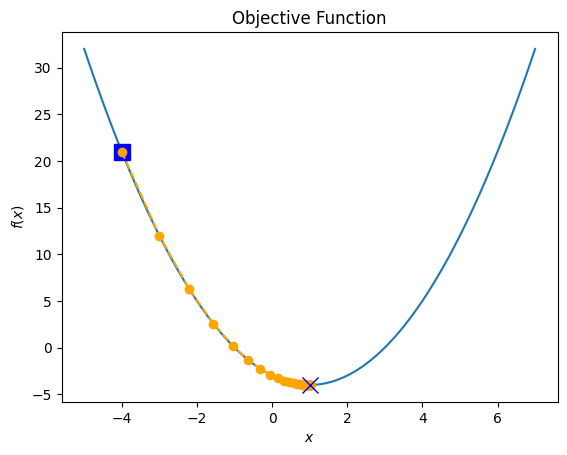

In [33]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=0.1)
plotPath(xs, ys, x0)

Solution found:
  y = -4.0000
  x = 1.0000


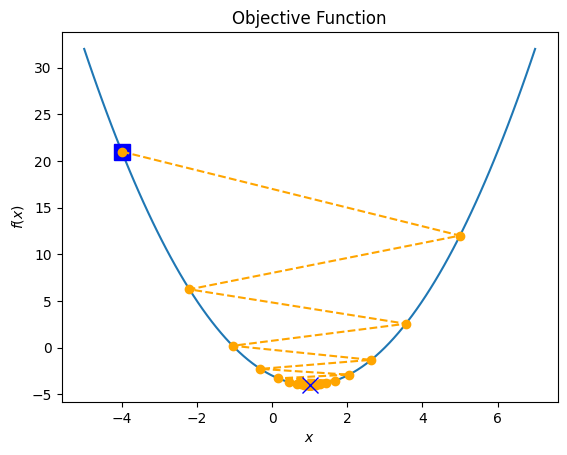

In [34]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=0.9)
plotPath(xs, ys, x0)

Gradient descent does not converge.


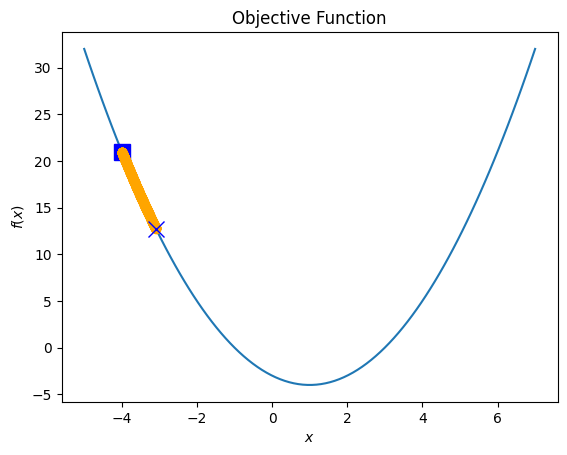

In [35]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=1e-4)
plotPath(xs, ys, x0)

Gradient descent does not converge.


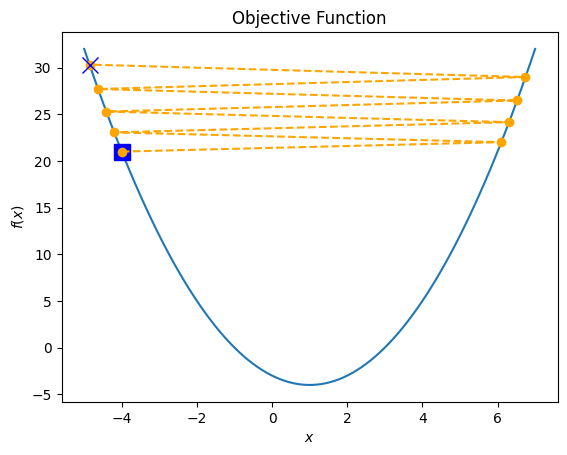

In [36]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=1.01, max_iter=8)
plotPath(xs, ys, x0)